# Resultados preeliminares da FBP


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, iradon
from phantominator import shepp_logan
import pylibjpeg
import os
import pydicom
from pydicom.data import get_testdata_file

In [2]:
def import_shepp_logan(size=512):
    image_flipped = shepp_logan(512)
    image_phantom = np.flip(image_flipped)
    return image_phantom

# authors : Guillaume Lemaitre <g.lemaitre58@gmail.com>
# license : MIT

import pydicom
import pylibjpeg
from pydicom.data import get_testdata_file

def read_dcm_no_info(img_name):    
    os.chdir('images_dcm/')
    filename = get_testdata_file(img_name)
    dataset = pydicom.dcmread(img_name)
    os.chdir('../')
    return dataset.pixel_array

def Radon(image, number_angles = 500):
    angles = np.linspace(0, 180, number_angles)
    sinogram = radon(image, theta = angles, circle = False, preserve_range=True)
    return sinogram

def Iradon(sinogram, number_angles = 500, filter_name = 'hann', interpolation = 'nearest'):
    angles = np.linspace(0, 180, number_angles)
    fbp = iradon(sinogram, theta = angles, circle = False, filter_name = filter_name, interpolation = interpolation)
    return fbp

def MSE(original, compared):
    return mean_squared_error(original, compared)

def SSIM(original, compared):
    return ssim(original, compared, data_range=compared.max() - compared.min())

## FBP com phantoma de Shepp-Logan

In [3]:
shepp_logan = import_shepp_logan();
sinogram_shepp_logan = Radon(shepp_logan, 1000)
fbp_shepp_logan = Iradon(sinogram_shepp_logan, 1000)

In [4]:
# Análise de dados
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

In [5]:
mse_original_shepp_logan = MSE(shepp_logan, shepp_logan)
ssim_original_shepp_logan = SSIM(shepp_logan, shepp_logan)

mse_fbp_shepp_logan = MSE(shepp_logan, fbp_shepp_logan)
ssim_fbp_shepp_logan = SSIM(shepp_logan, fbp_shepp_logan)

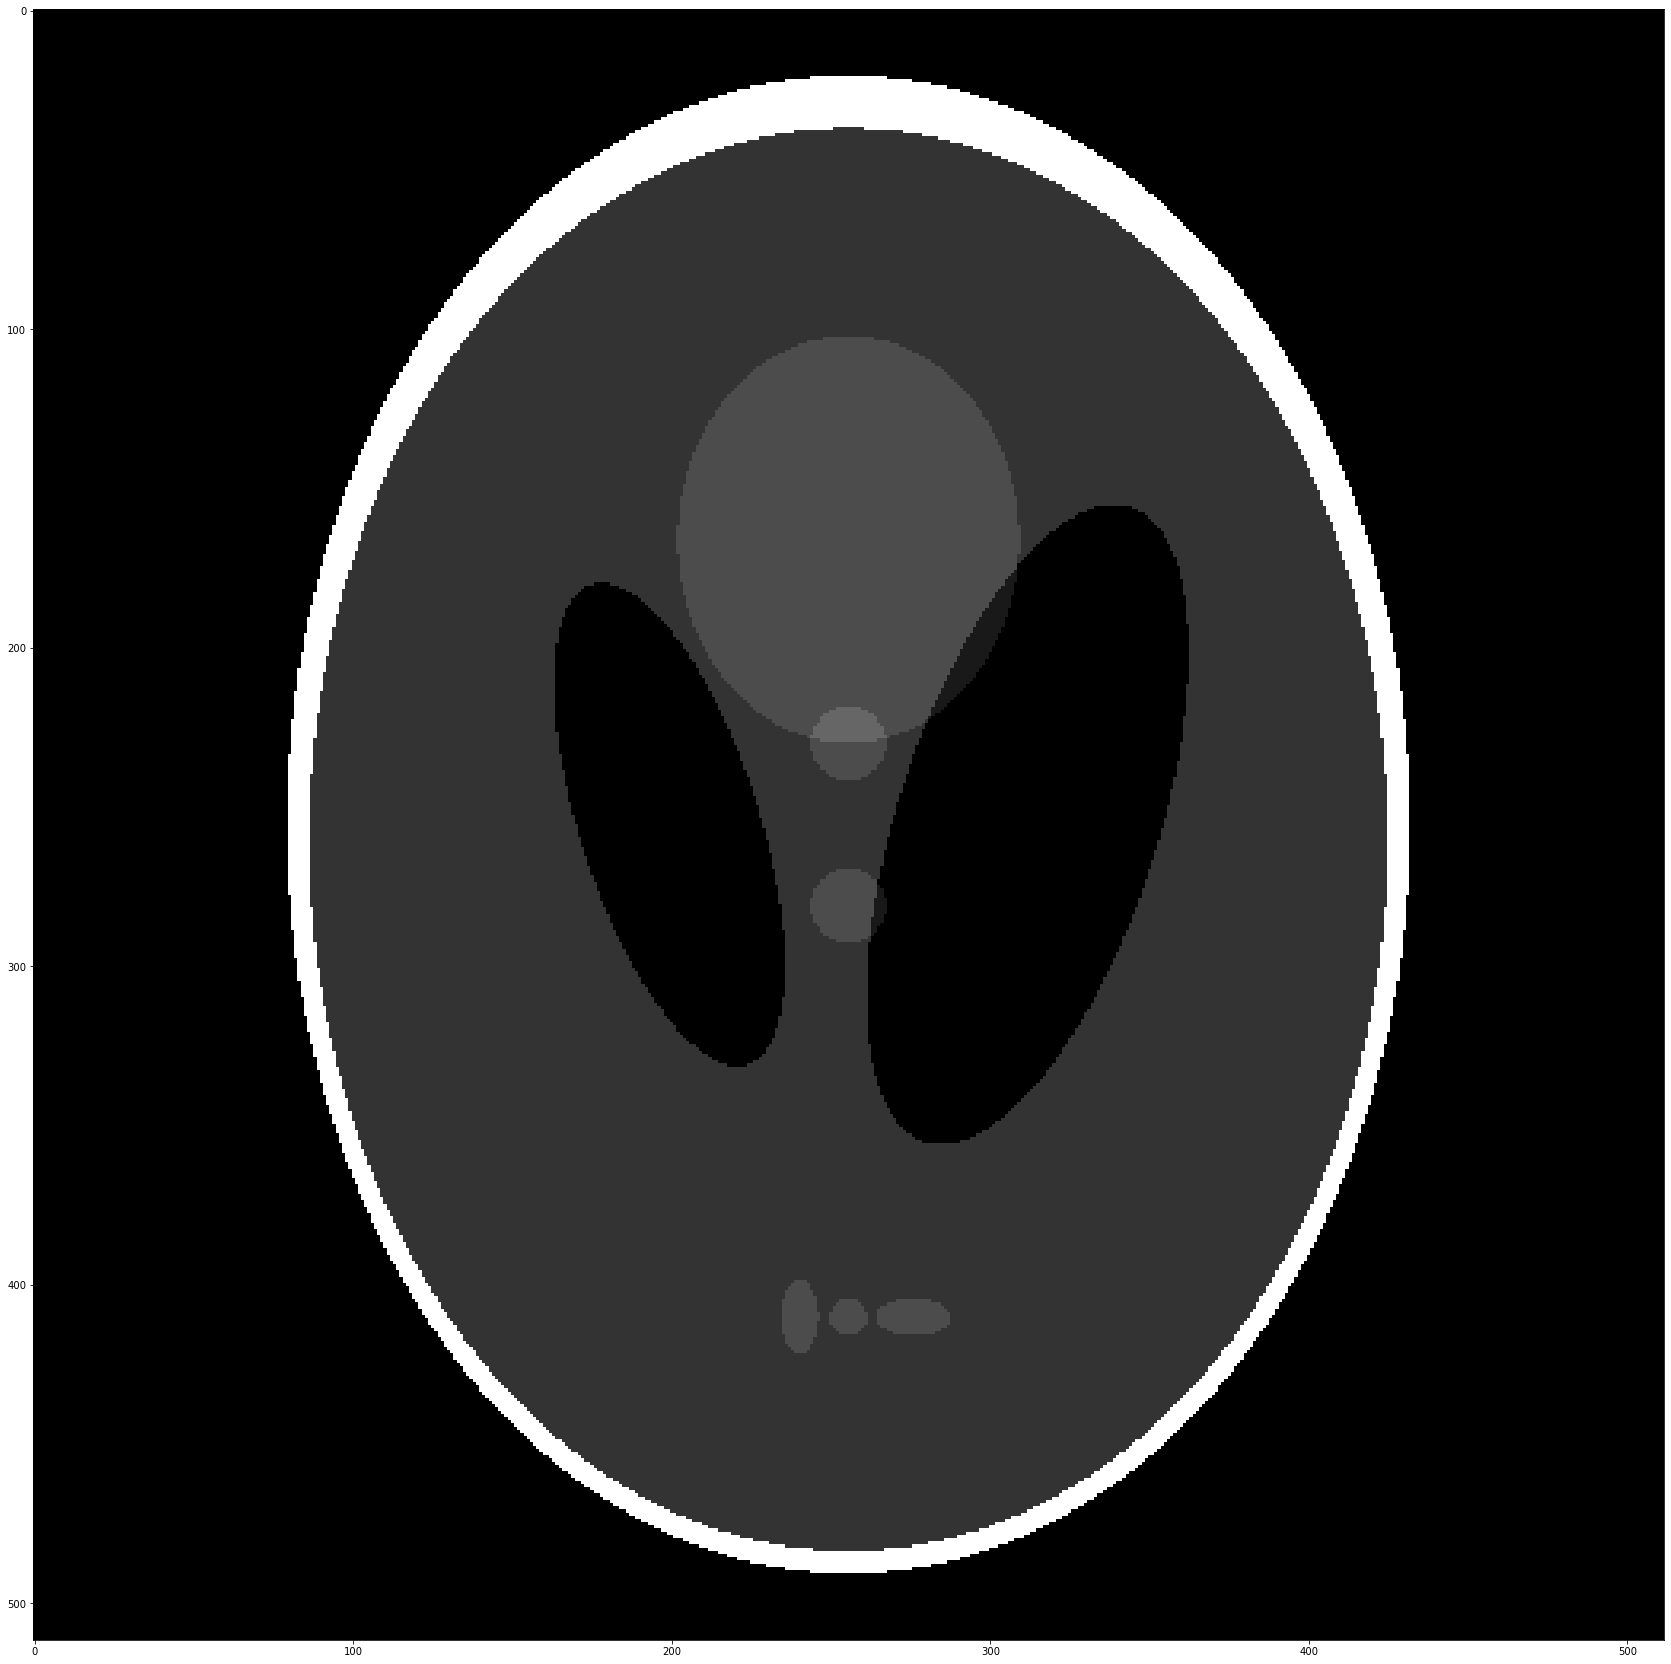

In [8]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(30, 30))
ax1.imshow(shepp_logan, cmap=plt.cm.gray)
plt.savefig('original_SL.png', dpi=300)

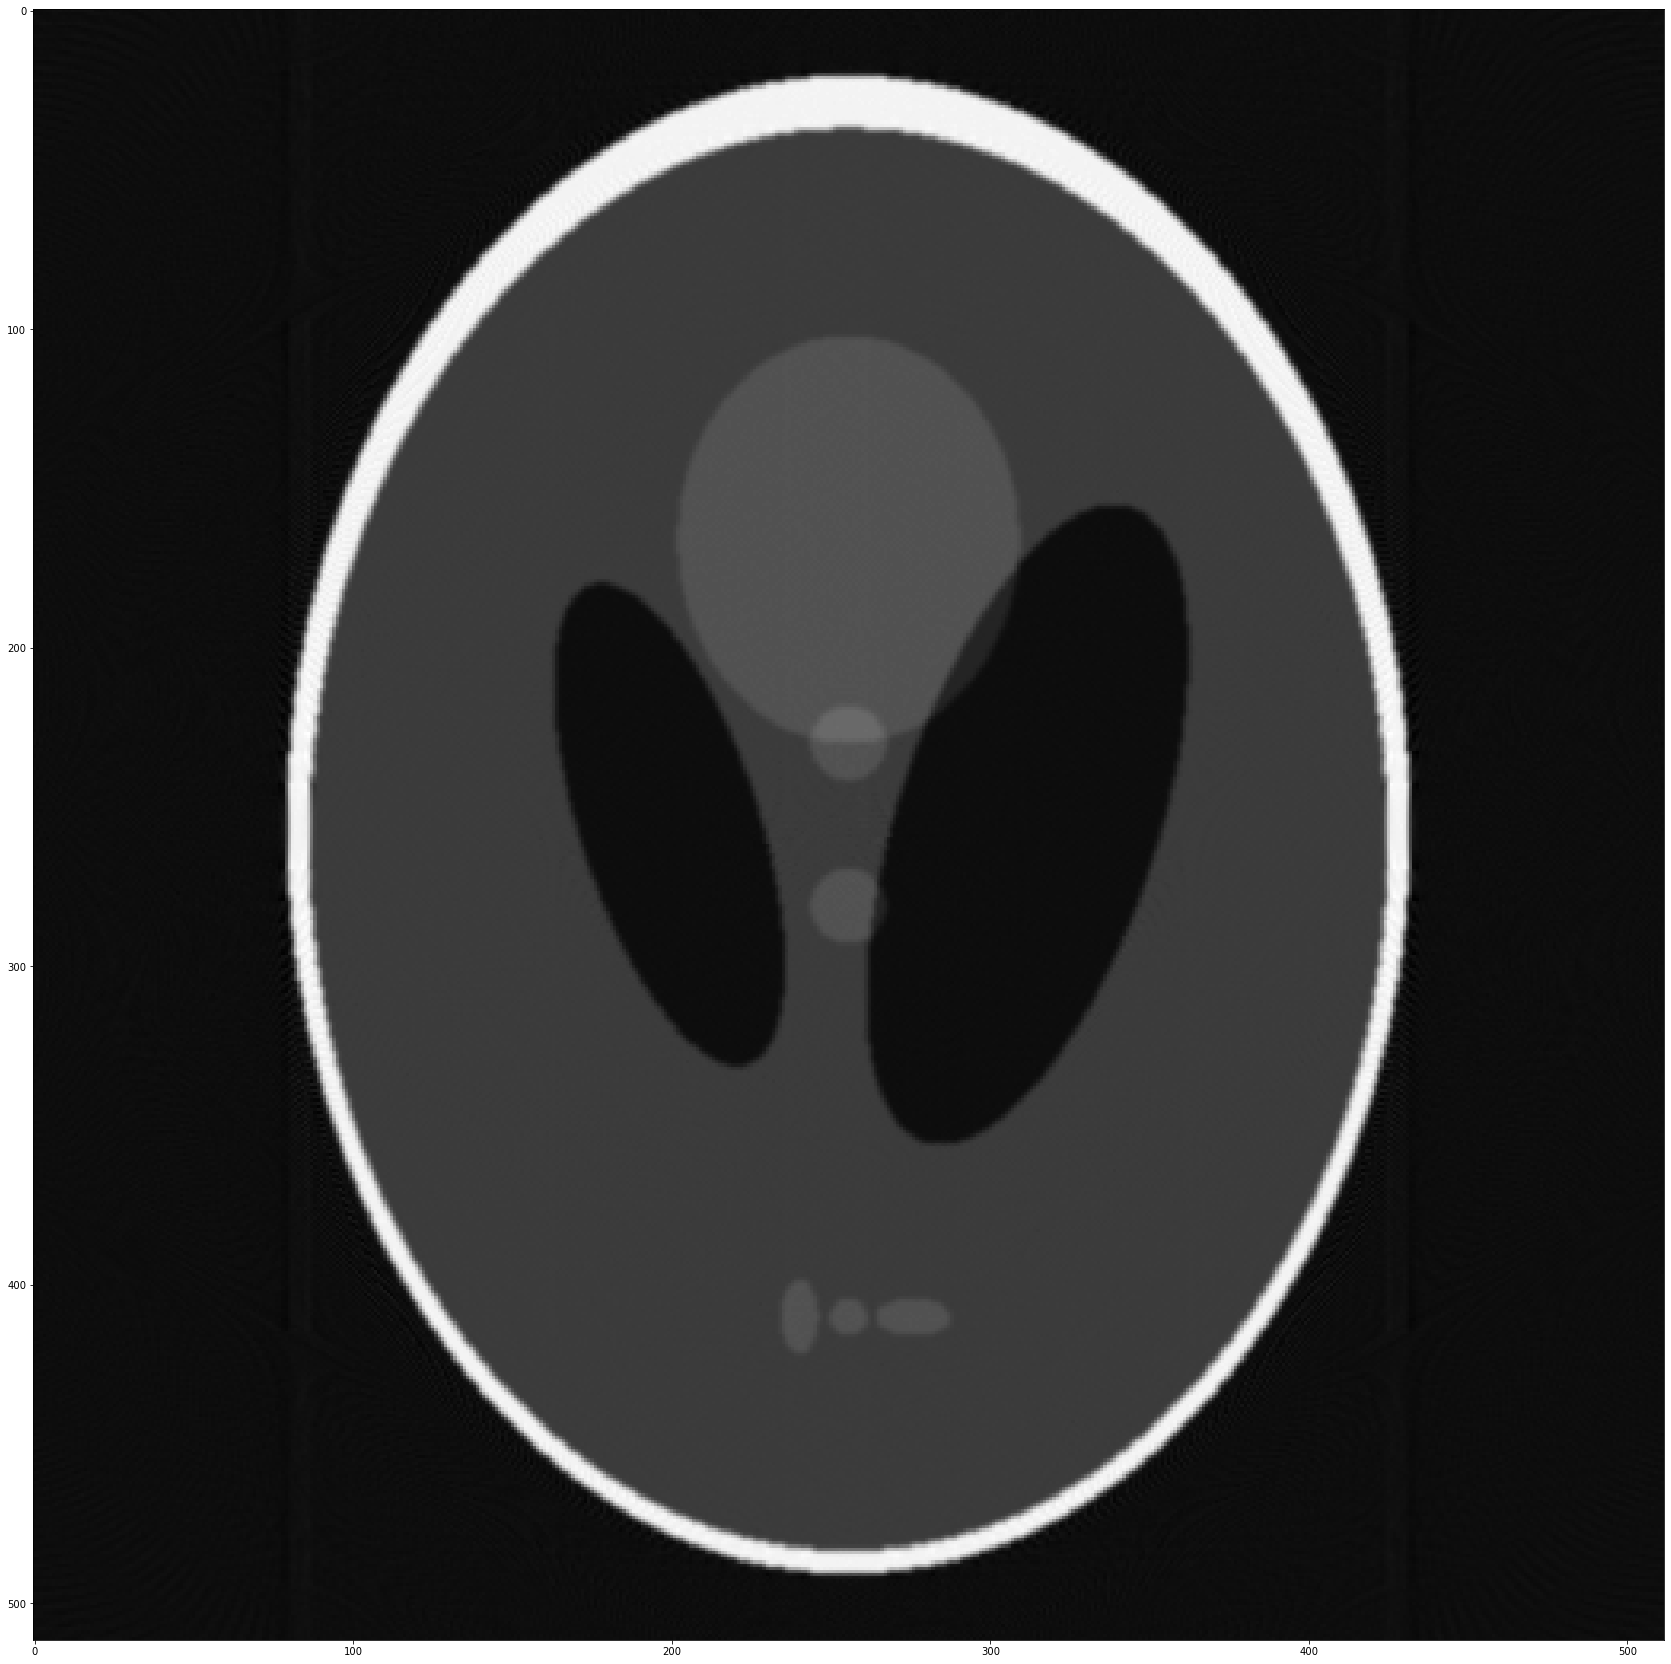

In [9]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(30, 30))
ax1.imshow(fbp_shepp_logan, cmap=plt.cm.gray)
plt.savefig('FBP_SL.png', dpi=300)

## FBP com imagem real

In [10]:
img = read_dcm_no_info('CT000209.dcm')

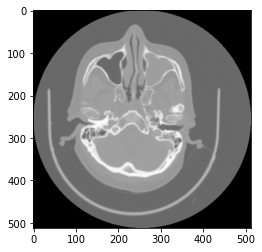

In [11]:
plt.imshow(img, cmap='gray')

In [12]:
img[img <= -1000] = -1000

In [13]:
sinogram_img = Radon(img, 1000)

In [14]:
fbp_img = Iradon(sinogram_img, 1000, filter_name = 'hann')

In [15]:
mse_original_img = MSE(img, img)
ssim_original_img = SSIM(img, img)

mse_fbp_img = MSE(img, fbp_img)
ssim_fbp_img = SSIM(img, fbp_img)

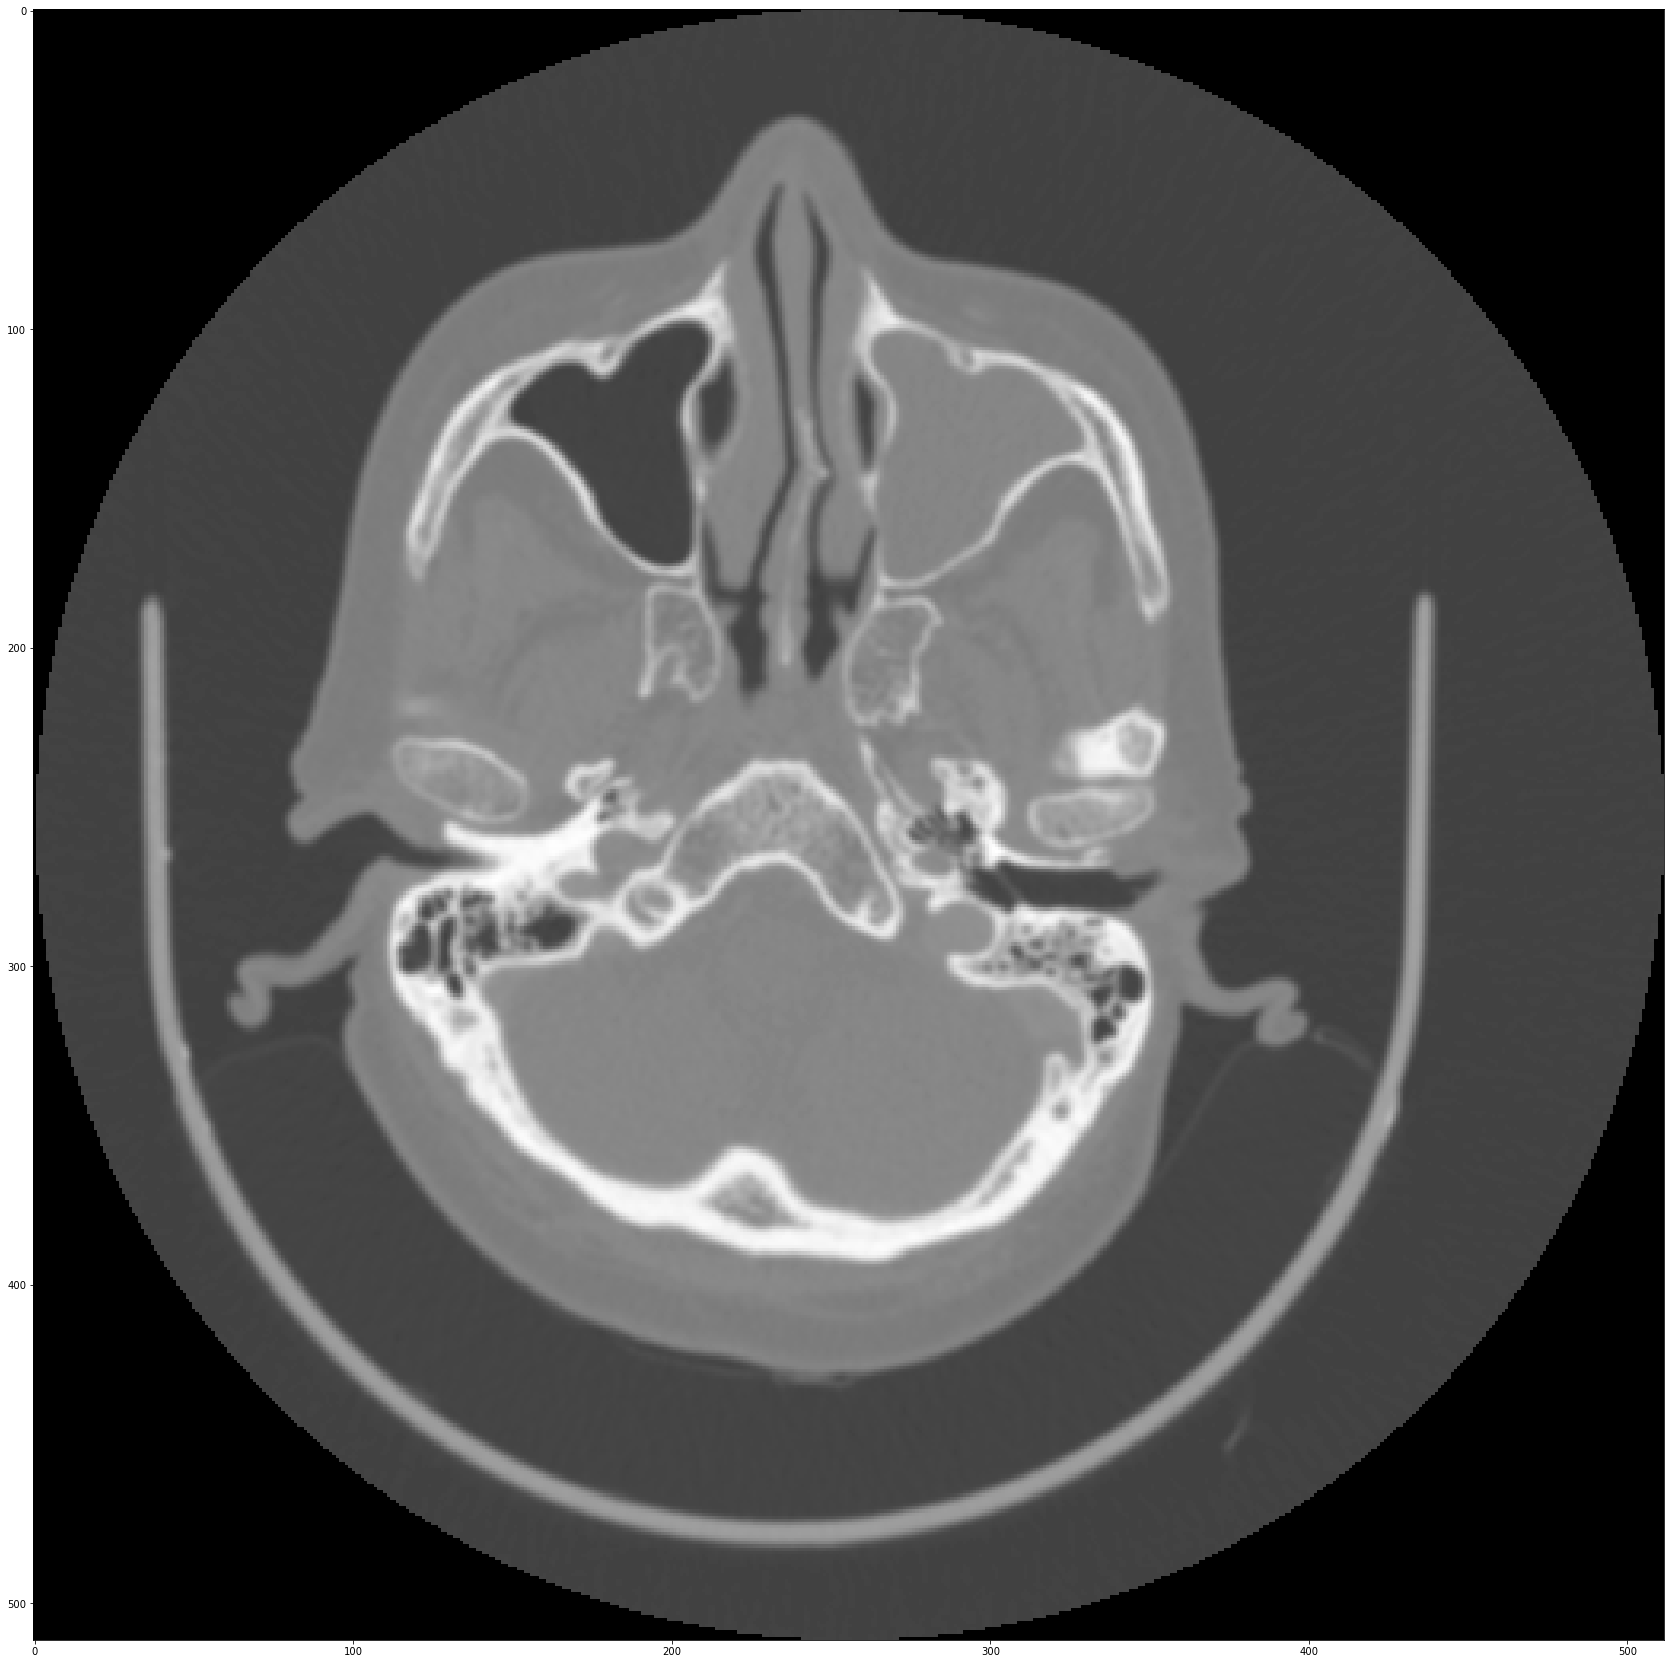

In [16]:
fig,ax1 = plt.subplots(nrows=1, ncols=1, figsize=(30, 30))
ax1.imshow(img, cmap=plt.cm.gray)
plt.savefig('original_DS.png', dpi=300)

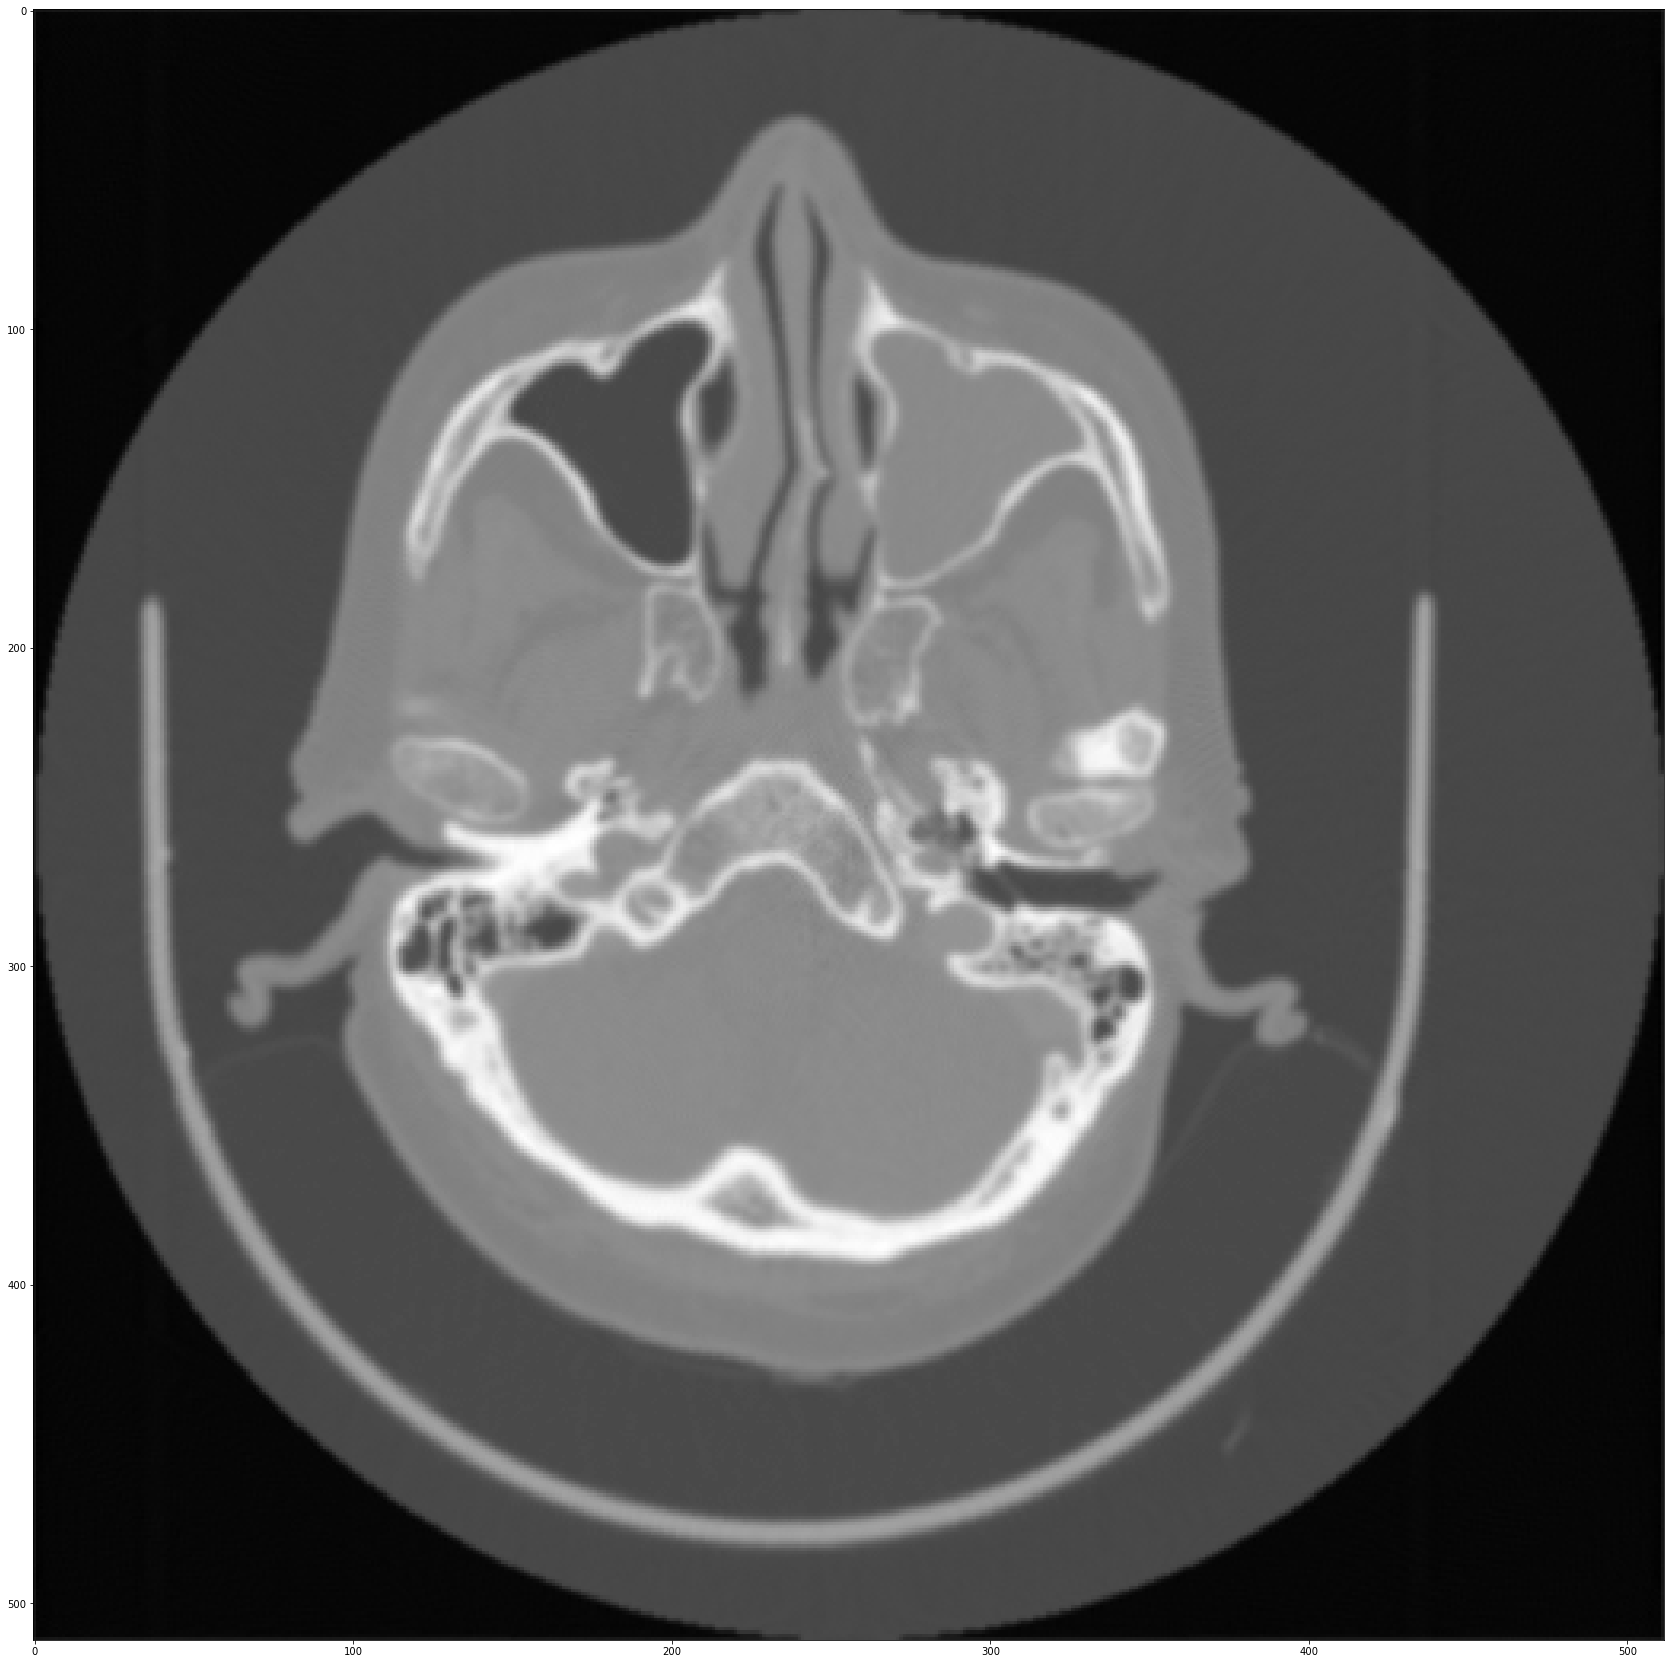

In [17]:
fig,ax1 = plt.subplots(nrows=1, ncols=1, figsize=(30, 30))
ax1.imshow(fbp_img, cmap=plt.cm.gray)
plt.savefig('fbp_DS.png', dpi=300)